## 01. Import Libraries

In [105]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 02. Import Data

In [8]:
# establish path
path = r'/Users/piperdutcher/Documents/Achievement 6/02 Data/Prepared Data'

In [19]:
# import data

df = pd.read_pickle(os.path.join(path, 'initial_clean.pkl'))

## 03. Exploratory Visual Analysis

In [25]:
pd.set_option('display.max_columns', None)
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated zipcode  latitude  longitude  \
0              0      1955             0   98178   47.5112   -122.257   
1            400      1951          1991   98125   47.7210   -122.319   
2              0      1933             0   98028   47.7379   -122.233   
3            910      1965             0   98136   47.5208   -122.393   
4              0      1987             0   98074   47.6168   -122.045   

   sqft_living15  sqft_lot15  month  year  
0           1340        5650     10  2014  
1           1690        7639     12  2014  
2           2720        8062      2  2015  
3           1360        5000     12  2014  
4           1800        7503      2  2015

In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latitude', 'longitude', 'sqft_living15', 'sqft_lot15', 'month',
       'year'],
      dtype='object')

In [389]:
df['bedrooms'].value_counts()

bedrooms
3     9823
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
0        2
11       1
Name: count, dtype: int64

In [393]:
df['year'].value_counts()

year
2014    14622
2015     6975
Name: count, dtype: int64

In [395]:
df['month'].value_counts()

month
5     2414
4     2229
7     2210
6     2177
8     1939
10    1878
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: count, dtype: int64

In [400]:
df2015 = df.loc[df['year'] == 2015]
df2015['month'].value_counts()

month
4    2229
3    1875
2    1247
1     978
5     646
Name: count, dtype: int64

In [27]:
# the following column would be considered categorical: waterfront, view
# will create a new column/category for condition/grade in order to use this as categorical info as well

In [29]:
# starting with condition, the categories are as followed and as determined by the King County Assessor Website
#
# If Condition = 1, then Poor
# If Condition = 2, then Fair
# If Condition = 3, then Average
# If Condition = 4, then Good
# If Condition = 5, then Very Good

# start with empty list, then for-loop

condition_result = []

for num in df['condition']:
    if num == 1:
        condition_result.append('Poor')
    elif num == 2:
        condition_result.append('Fair')
    elif num ==3:
        condition_result.append('Average')
    elif num == 4:
        condition_result.append('Good')
    elif num == 5:
        condition_result.append('Very Good')

In [31]:
# populate a new column with this list:

df['condition_definition'] = condition_result

In [33]:
# double check the value counts:
df['condition_definition'].value_counts()

condition_definition
Average      14021
Good          5676
Very Good     1700
Fair           171
Poor            29
Name: count, dtype: int64

In [35]:
# we can now use condiiton_definition as a categorical variable

In [47]:
# repeat this process with grade:

# start with empty list,then move into for-loop

grade_result = []

for g in df['grade']:
    if g in range(1,3):
        grade_result.append('Inferior Structure')
    elif g == 4:
        grade_result.append('Low Quality, Not to Code')
    elif g == 5:
        grade_result.append('Small, Simple, Below Code')
    elif g == 6:
        grade_result.append('Low Quality, Meets Code')
    elif g == 7:
        grade_result.append('Average Grade')
    elif g == 8:
        grade_result.append('Just Above Average')
    elif g == 9:
        grade_result.append('Better Quality and Design')
    elif g == 10:
        grade_result.append('High Quality')
    elif g == 11:
        grade_result.append('Custom Design, High Quality')
    elif g == 12:
        grade_result.append('Custom Design, Highest Quality')
    elif g == 13:
        grade_result.append('Mansion, Highest Quality')
    else:
        grade_result.append('None')

In [51]:
# populate new column with this list, then check value counts for each grade:

df['grade_def'] = grade_result
df['grade_def'].value_counts()

grade_def
Average Grade                     8973
Just Above Average                6065
Better Quality and Design         2615
Low Quality, Meets Code           2038
High Quality                      1134
Custom Design, High Quality        399
Small, Simple, Below Code          241
Custom Design, Highest Quality      89
Low Quality, Not to Code            29
Mansion, Highest Quality            13
None                                 1
Name: count, dtype: int64

In [53]:
## grade_def can now be used as a categorical variable

In [55]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latitude', 'longitude', 'sqft_living15', 'sqft_lot15', 'month', 'year',
       'condition_definition', 'grade_def'],
      dtype='object')

In [57]:
## columns to be excluded in visualizations: id, date, latitude, longitude, month, year
## possibly will exclude sqft_living15, sqft_lot15

In [59]:
## export this data frame with new columns before dropping columns for visualizations:

df.to_pickle(os.path.join(path, 'grade_condition_flags.pkl'))

In [73]:
## new dataframe with relevant columns:

df1_withcat = df.drop(columns = ['id','date','latitude','latitude','longitude','zipcode','month','year'])

In [75]:
df1_withcat.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   sqft_living15  sqft_lot15 condition_definition                grade_def  
0           1340        5650              Average            Average Grade  
1           1690        7639              Average            Average Grade  
2           2720        8062              Average  Low Quality, Meets Code  
3           1360        5000            Very Good            Average Grade  
4           1800        7503              Average       Just Above Average

In [81]:
# create a correlation matrix, need to make the dataframe without categorical columns 'condition_definition' & ' grade_def'

df1_nocat = df1_withcat.drop(columns=['condition_definition','grade_def'])

In [79]:
df1_nocat.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.316019   0.525918     0.701908  0.089708  0.256888   
bedrooms       0.316019  1.000000   0.528030     0.593350  0.032786  0.183899   
bathrooms      0.525918  0.528030   1.000000     0.755785  0.087985  0.502668   
sqft_living    0.701908  0.593350   0.755785     1.000000  0.172997  0.354053   
sqft_lot       0.089708  0.032786   0.087985     0.172997  1.000000 -0.005015   
floors         0.256888  0.183899   0.502668     0.354053 -0.005015  1.000000   
waterfront     0.266440 -0.006836   0.063745     0.103852  0.021603  0.023758   
view           0.397328  0.082484   0.188392     0.284706  0.074801  0.028826   
condition      0.036148  0.023923  -0.126153    -0.059074 -0.008941 -0.263859   
grade          0.667831  0.366851   0.665860     0.762807  0.114028  0.458879   
sqft_above     0.605395  0.492745   0.686703     0.876468  0.183706  0.524055   
sqft_basement  0.323784  0.309275   0.283486     0.435169  0.015294 -0.245626   
yr_built       0.053959  0.160538   0.507042     0.318028  0.053168  0.489120   
yr_renovated   0.126422  0.019216   0.050551     0.055317  0.007641  0.006436   
sqft_living15  0.585218  0.404238   0.569736     0.756231  0.144711  0.280074   
sqft_lot15     0.082476  0.030537   0.087566     0.183439  0.718543 -0.011037   

               waterfront      view  condition     grade  sqft_above  \
price            0.266440  0.397328   0.036148  0.667831    0.605395   
bedrooms        -0.006836  0.082484   0.023923  0.366851    0.492745   
bathrooms        0.063745  0.188392  -0.126153  0.665860    0.686703   
sqft_living      0.103852  0.284706  -0.059074  0.762807    0.876468   
sqft_lot         0.021603  0.074801  -0.008941  0.114028    0.183706   
floors           0.023758  0.028826  -0.263859  0.458879    0.524055   
waterfront       1.000000  0.401971   0.016637  0.082875    0.072108   
view             0.401971  1.000000   0.046088  0.251695    0.167612   
condition        0.016637  0.046088   1.000000 -0.146292   -0.158514   
grade            0.082875  0.251695  -0.146292  1.000000    0.756085   
sqft_above       0.072108  0.167612  -0.158514  0.756085    1.000000   
sqft_basement    0.080564  0.277096   0.173895  0.168304   -0.052070   
yr_built        -0.026159 -0.053660  -0.361460  0.447580    0.423904   
yr_renovated     0.092873  0.103951  -0.060730  0.014289    0.023258   
sqft_living15    0.086503  0.280666  -0.092927  0.713468    0.731611   
sqft_lot15       0.030707  0.072695  -0.003298  0.119705    0.194208   

               sqft_basement  yr_built  yr_renovated  sqft_living15  \
price               0.323784  0.053959      0.126422       0.585218   
bedrooms            0.309275  0.160538      0.019216       0.404238   
bathrooms           0.283486  0.507042      0.050551       0.569736   
sqft_living         0.435169  0.318028      0.055317       0.756231   
sqft_lot            0.015294  0.053168      0.007641       0.144711   
floors             -0.245626  0.489120      0.006436       0.280074   
waterfront          0.080564 -0.026159      0.092873       0.086503   
view                0.277096 -0.053660      0.103951       0.280666   
condition           0.173895 -0.361460     -0.060730      -0.092927   
grade               0.168304  0.447580      0.014289       0.713468   
sqft_above         -0.052070  0.423904      0.023258       0.731611   
sqft_basement       1.000000 -0.133064      0.071246       0.200432   
yr_built           -0.133064  1.000000     -0.224920       0.326319   
yr_renovated        0.071246 -0.224920      1.000000      -0.002723   
sqft_living15       0.200432  0.326319     -0.002723       1.000000   
sqft_lot15          0.017312  0.071068      0.007859       0.183242   

               sqft_lot15  
price            0.082476  
bedrooms         0.030537  
bathrooms        0.087566  
sqft_living      0.183439  
sqft_lot         0.718543  
floors          -0.011037  
waterfront 

# 04. Correlation Matrix Heatmap

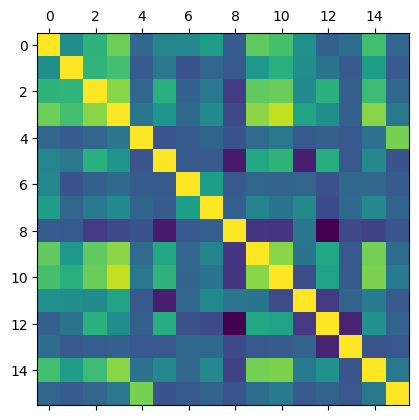

In [141]:
# create a correlation matrix heatmap:
# using matplotlib

corr_map = plt.matshow(df1_nocat.corr())

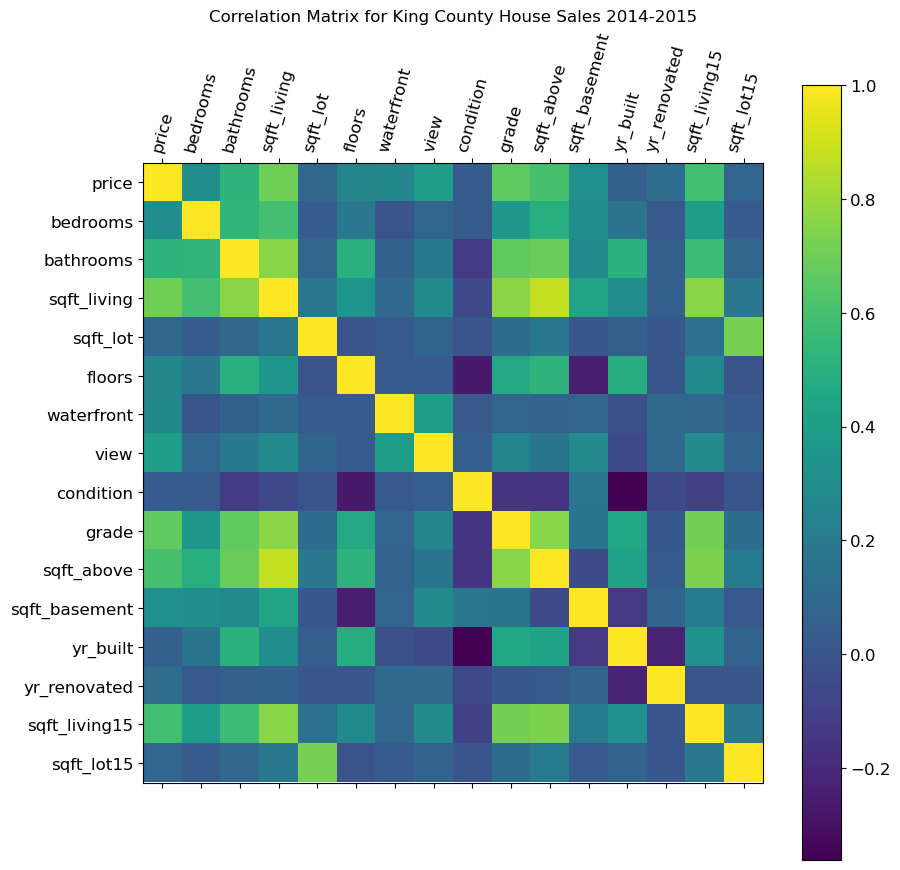

In [159]:
## need to add axis / labels etc for clarity

# figure size
f = plt.figure(figsize=(10,10))

# figure/plot type
plt.matshow(df1_nocat.corr(), fignum=f.number)

# x-axis labels
plt.xticks(range(df1_nocat.shape[1]), df1_nocat.columns, fontsize = 12, rotation = 75)

# y-axis labels
plt.yticks(range(df1_nocat.shape[1]), df1_nocat.columns, fontsize = 12)

# add color bar and adjust font size
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

# add title
plt.title('Correlation Matrix for King County House Sales 2014-2015', fontsize = 12)
plt.savefig('correlation_matrix_heatmap1.png')

For the above correlation heatmap (based off the correlation matrix), we can note that the lighter color indicates a positive correlation, with yellow being the strongest. A darker color indicates a negative correlation, with the strongest being purple. At initial glance, we can see that the variables with the highest correlation relative to house price are sqft_living, grade, sqft_living above, and sqft_living15. Surprisingly lot, condition, and yr_built have a negative correlation. This indicates that a large lot size and newer build year would not have a positive impact on price. # of bathrooms has more of an impact on home price than # of bedrooms, and grade matters more than condition.

# 05. ScatterPlots

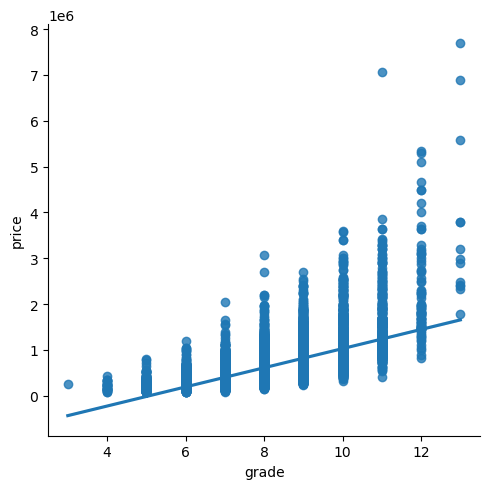

In [245]:
# create scatter plots for the highest relationships, focusing on price:

# Price & Grade

sns.lmplot(x = 'grade', y ='price', data = df1_nocat)
plt.savefig('grade_price_scatter.png')

Grade is more of a categorical variable in this case, but it can be noted that a home is more likely to have a higher price if it has a higher grade. . The correlation coefficient for this is 0.66, indicating a strong relationship.

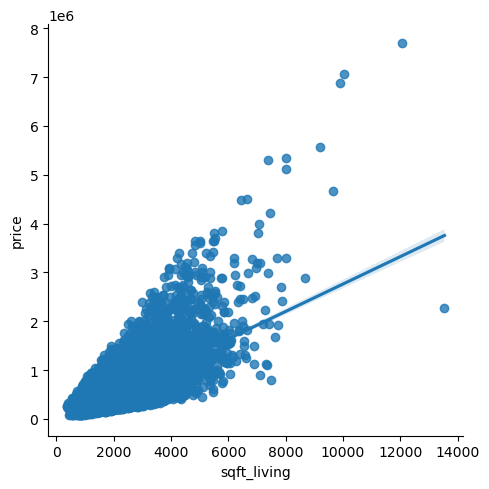

In [247]:
# Price & Sqft_Living

sns.lmplot(x = 'sqft_living', y ='price', data = df1_nocat)
plt.savefig('sqftliving_price_scatter.png')

With a correlation coefficient of 0.70, this variable highest the strongest relationship to price than any of the other variables. This can indicate that the greater a square footage a home has, the more likely it is to be sold at a higher price.

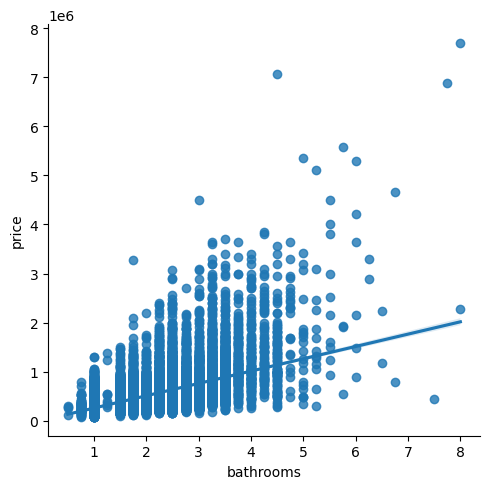

In [249]:
# Price & Bathrooms

sns.lmplot(x = 'bathrooms', y ='price', data = df1_nocat)
plt.savefig('bathrooms_price_scatter.png')

While the majority of the homes have under 5 bathrooms, there does appear to be a moderate to strong correlation between bathrooms and house prices. This could be attributed to the fact that a larger number of bedrooms and bathrooms typically add to overall square footage, which has been shown to have a positive relationship to price. The sqft_living correlation coefficients relative to bedrooms and bathrooms are 0.59 and 0.75 respectively.

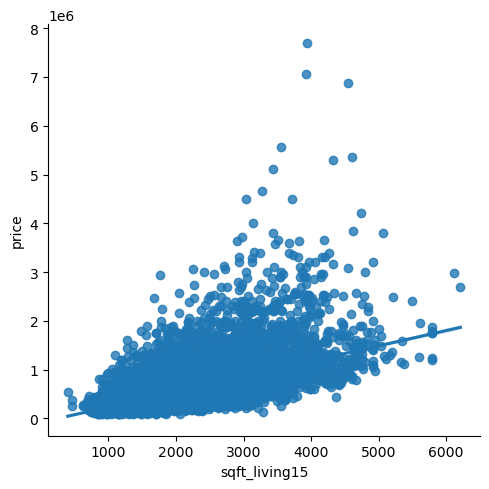

In [251]:
# Price & Sqft_Living15

sns.lmplot(x = 'sqft_living15', y ='price', data = df1_nocat)
plt.savefig('sqftliving15_price_scatter.png')

While price isn't directly impacted by the square footage of the neighboring 15 homes, there appears to be a moderate correlation (0.58). This can likely be explained by the fact that neighborhoods typically contain similarly sized homes (ie single family, townhome, condo, etc)

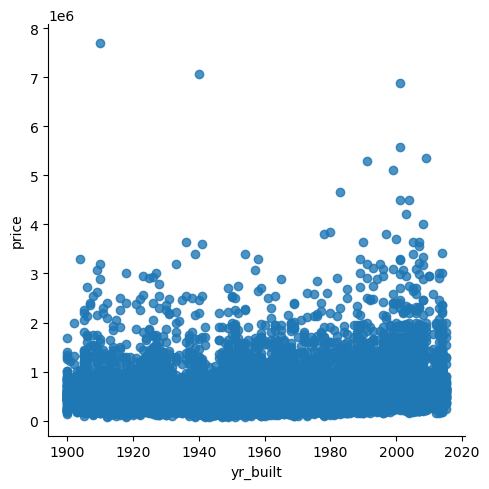

In [253]:
# Price & Year

sns.lmplot(x = 'yr_built', y = 'price', data = df1_nocat)
plt.savefig('yearbuilt_price_scatter.png')

The correlation between home price and year built is very low (0.05). Aside from a few outliers noted on this scatterplot, this is indicative of year built having little to no impact on a home's sale price.

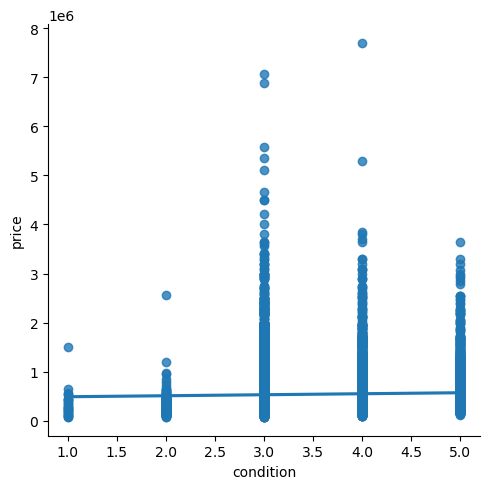

In [255]:
# Price & Condition

sns.lmplot(x = 'condition', y ='price', data = df1_nocat)
plt.savefig('condition_price_scatter.png')

Surprisingly, condition of home does not have a direct impact on price. While more homes are of average or above average condition, the correlation coefficient (0.036), indicates a very weak relationship between price and home condition.

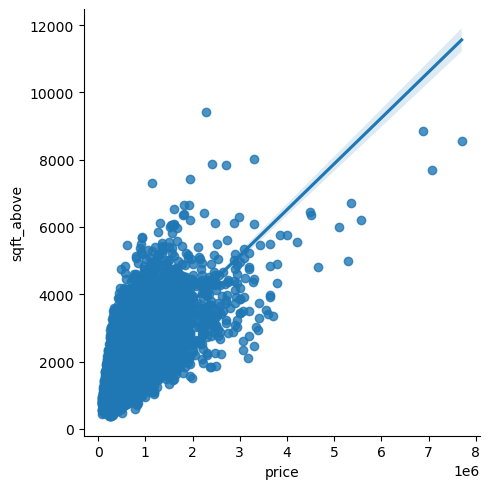

In [257]:
# Price & Square Feet Above Ground

sns.lmplot(x = 'price', y ='sqft_above', data = df1_nocat)
plt.savefig('sqftabove_price_scatter.png')

Price and Square footage above ground have a high correlation of 0.60. This is a similar metric to square footage of living area, so this relationship makes sense.

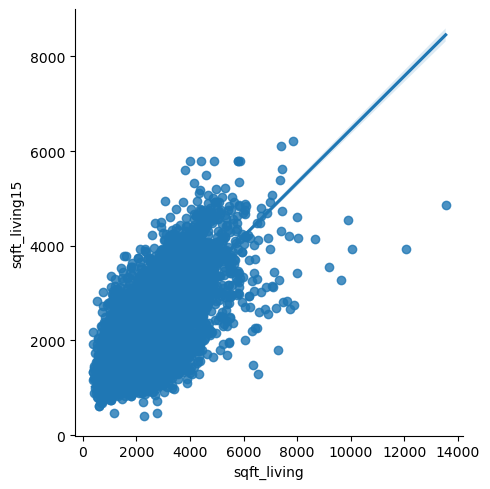

In [259]:
# Sqft_Living & Sqft_Living15

sns.lmplot(x = 'sqft_living', y ='sqft_living15', data = df1_nocat)
plt.savefig('sqft15_sqftliving.png')

This is the relationship between a homes square footage and the average square footage of the 15 nearest homes. This correlation coefficient is 0.756, indicating that neighborhoods are likely to have similarly sized homes. It could possibly be concluded that certain neighborhoods will then have higher home prices.

## 05. Pair Plot of Entire Data Set

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

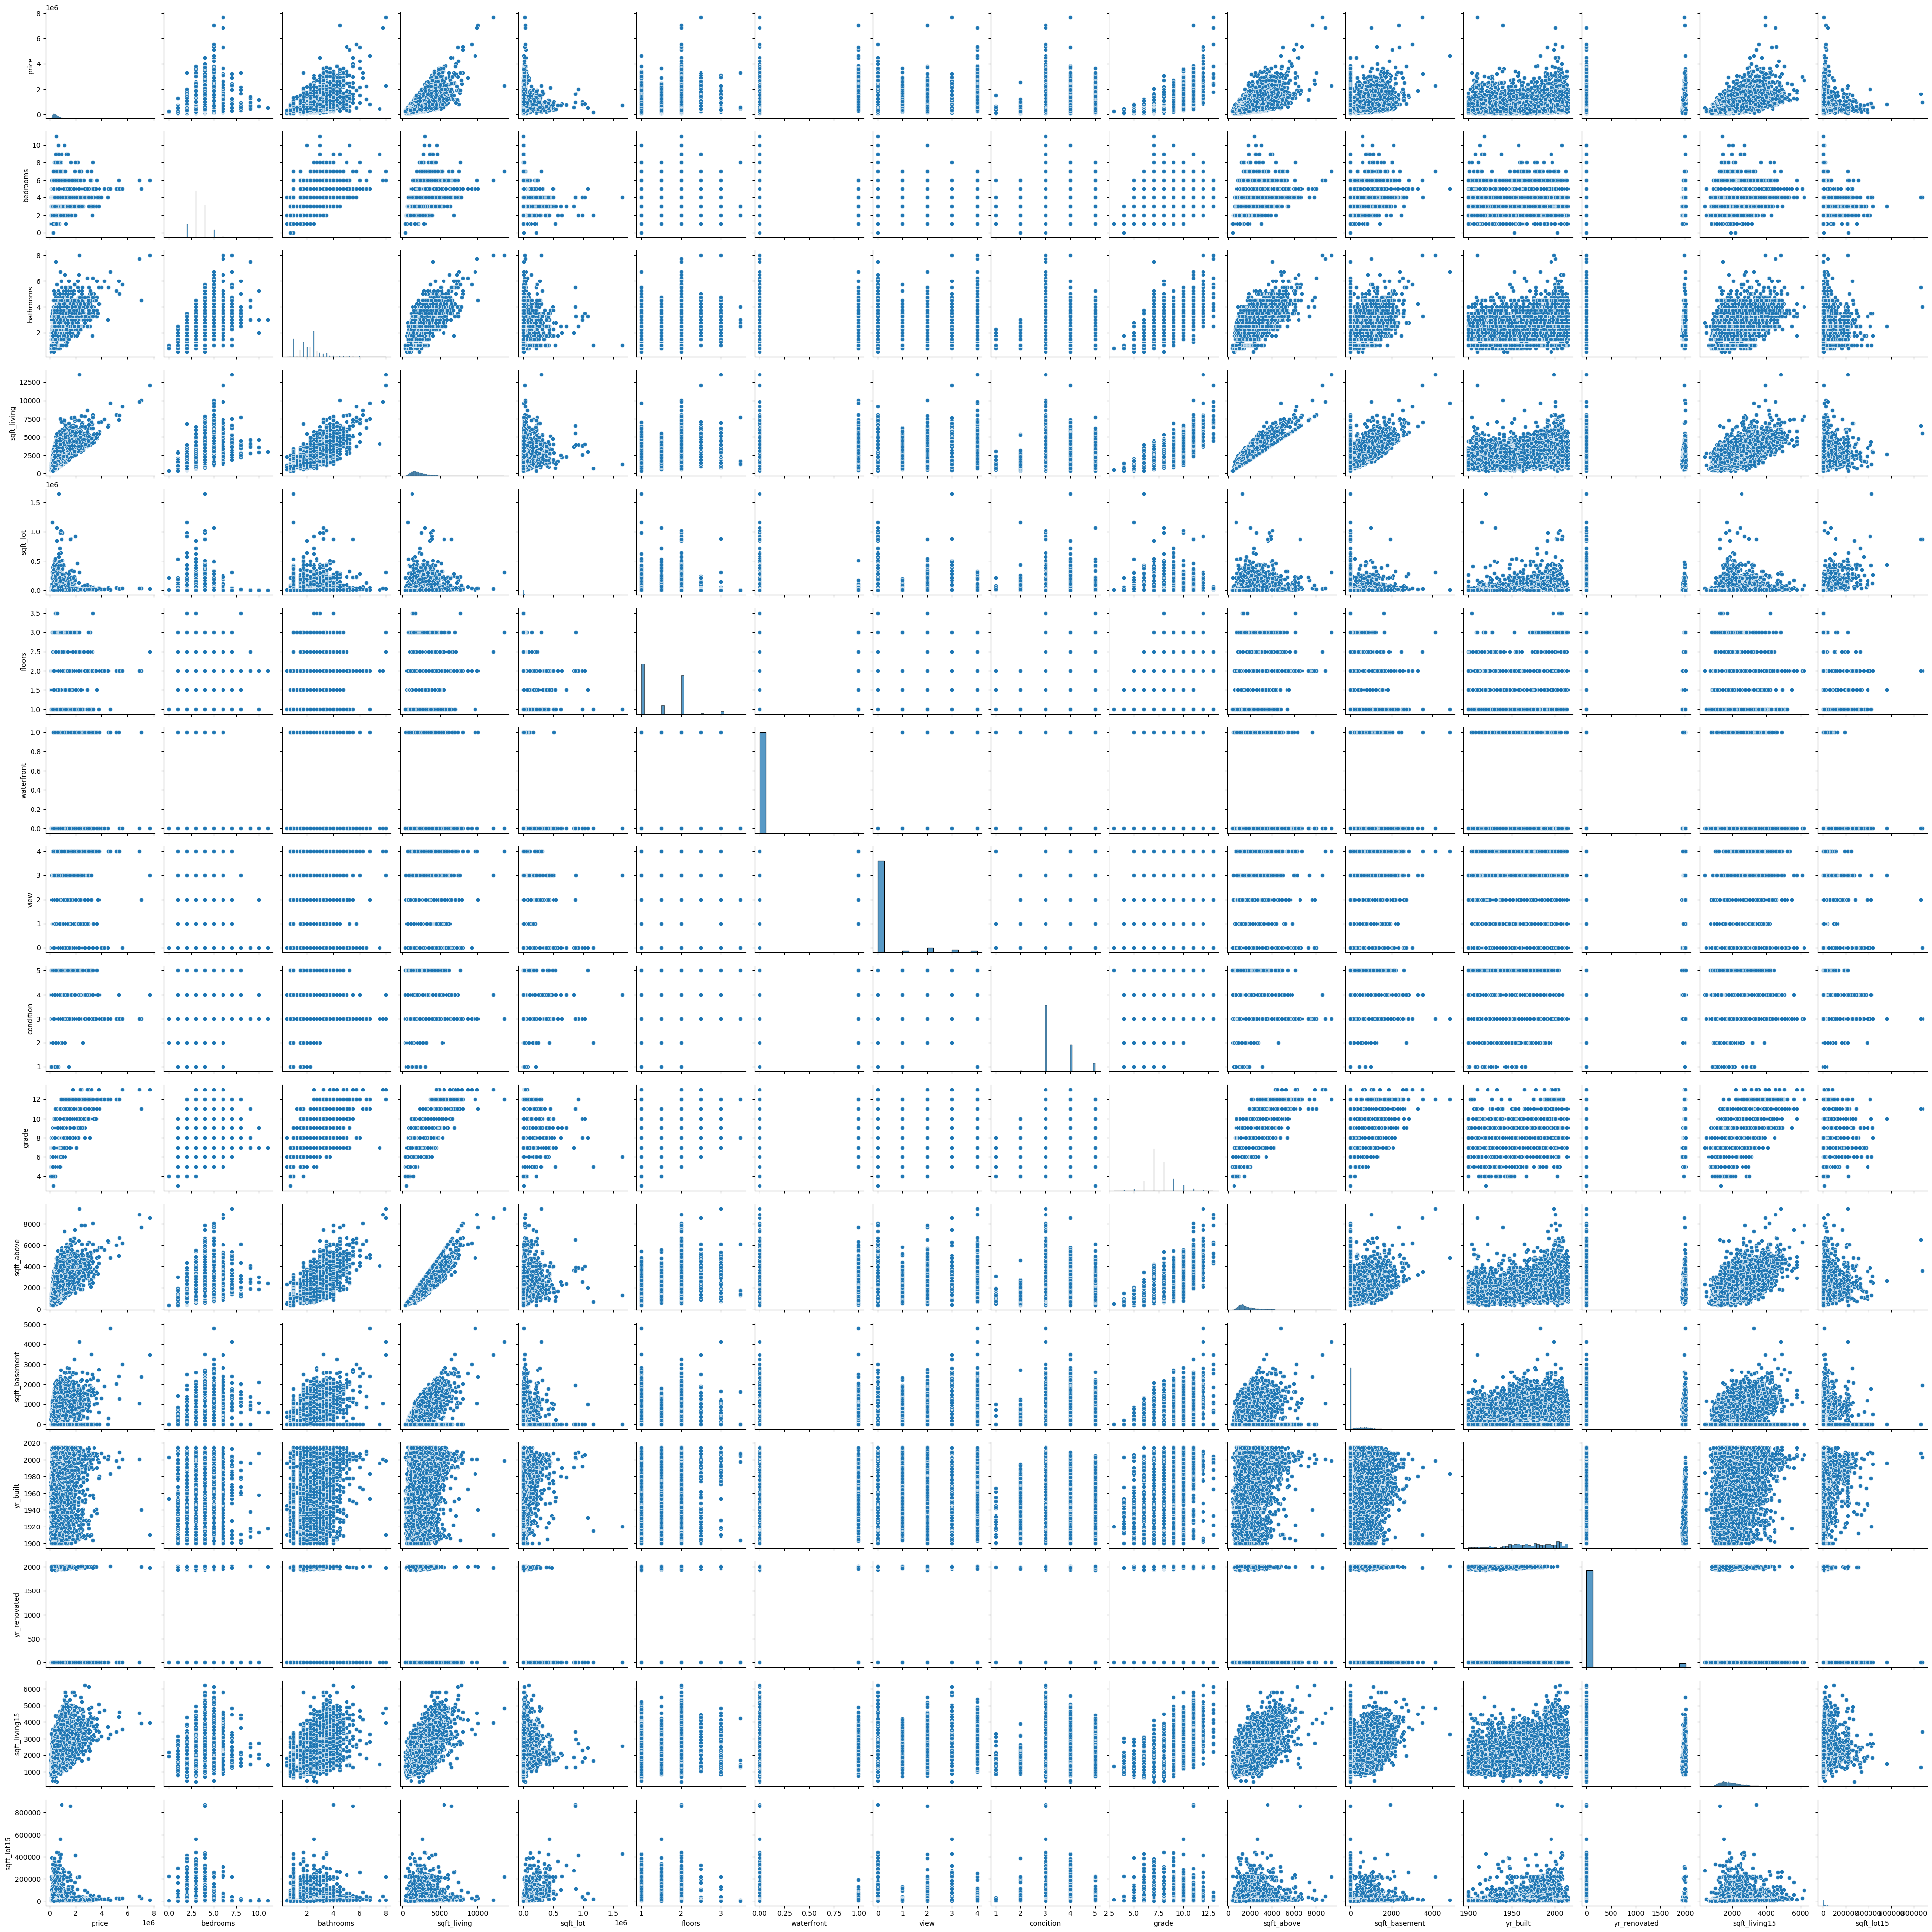

In [262]:
# only using the data from df1_nocat

p = sns.pairplot(df1_nocat)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

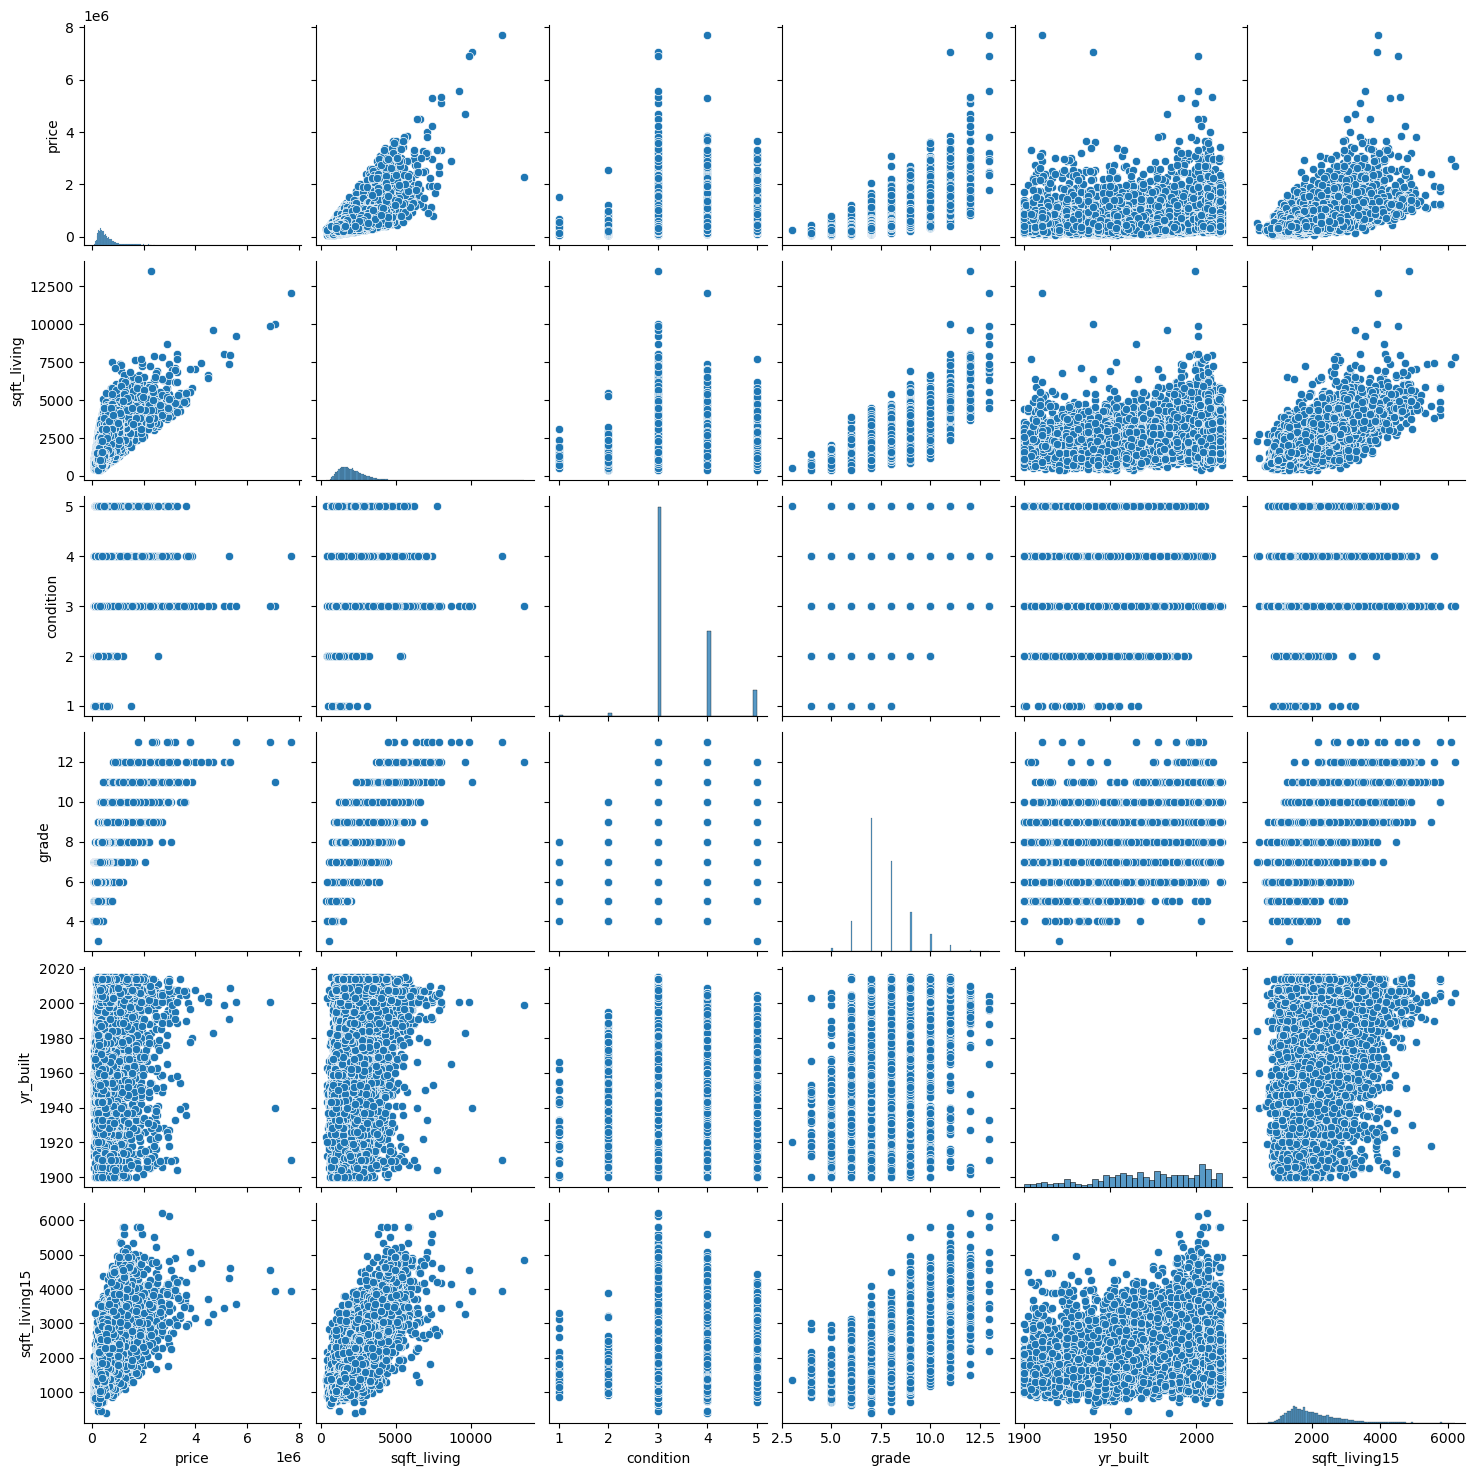

In [272]:
# redoing this with more relevant price-based information:

subset = df1_nocat[['price', 'sqft_living','condition','grade','yr_built','sqft_living15']]

p1 = sns.pairplot(subset)

## 06. Categorical Plots

In [275]:
## this is where I will use the new condition_definition and grade_def columns previously made

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


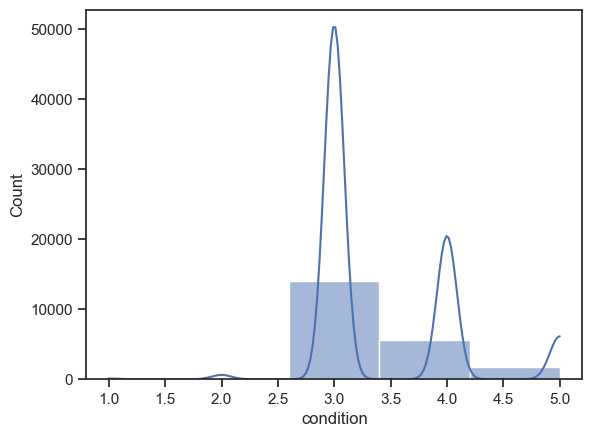

In [350]:
# condition:

sns.histplot(df['condition'], bins = 5, kde = True)
plt.savefig('condition1_hist.png')

This shows that most homes are of condition 3 and 4, with 3 being the vast majority.

In [301]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latitude', 'longitude', 'sqft_living15', 'sqft_lot15', 'month', 'year',
       'condition_definition', 'grade_def'],
      dtype='object')

In [309]:
df['condition_definition'].value_counts(dropna = False)

condition_definition
Average      14021
Good          5676
Very Good     1700
Fair           171
Poor            29
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


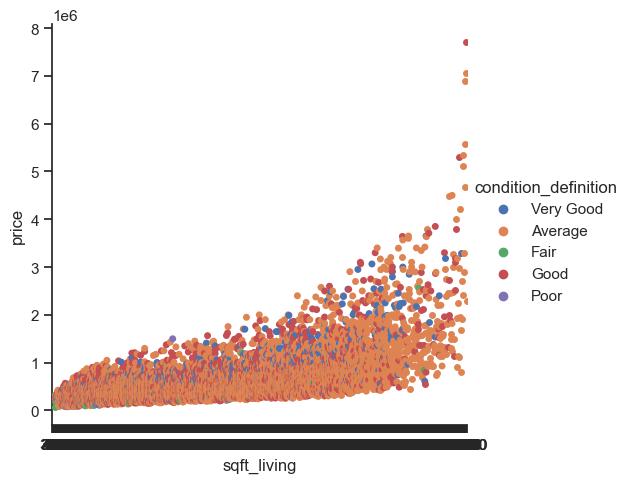

In [324]:
# categorical plot:

sns.catplot(x='sqft_living', y='price', hue='condition_definition', data=df)
plt.savefig('catplot_condition_sqft.png')

This plot reaffirms that the majority of homes are of average, good, or very good condition, but this is not necessarily impacting the sale price of the home. This also indicates that sqft and condition are not dependent on one another.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


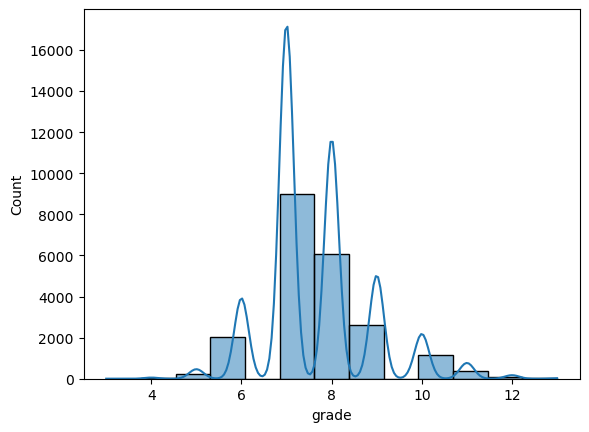

In [291]:
# grade

sns.histplot(df['grade'], bins = 13, kde = True)
plt.savefig('grade_hist.png')

This shows that most homes are in the middle grade or the range of 6-9, with the highest count being of grade 7.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


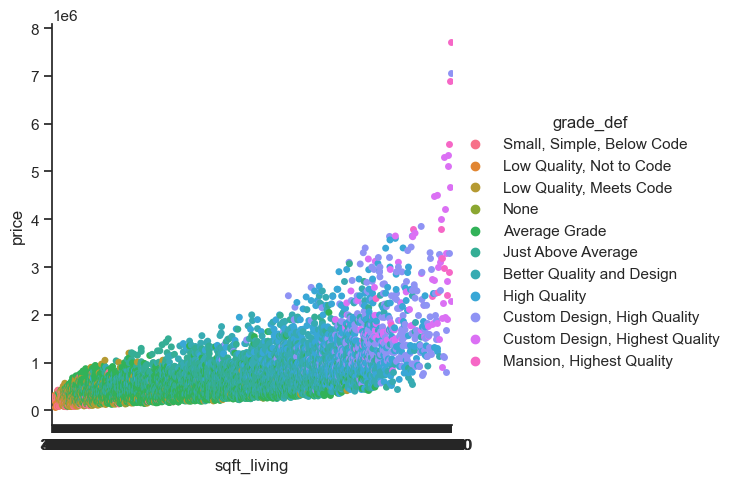

In [319]:
# using grade as category:

sns.catplot(x='sqft_living',y='price',hue='grade_def',data=df)
plt.savefig('grade_catplot.png')

This plot, while very colorful, does show that as the price and squarefootage of a home increase, the grade is also likely to increase.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


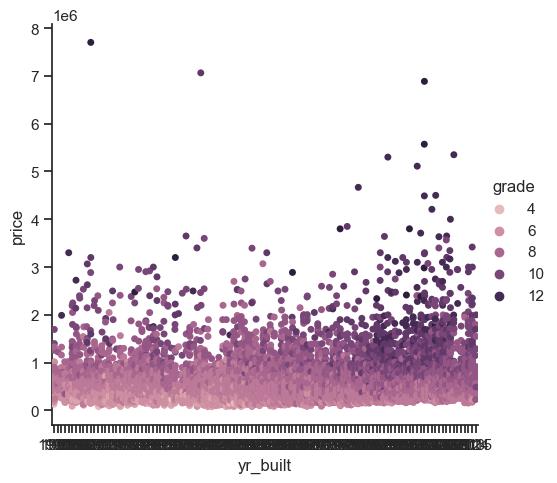

In [341]:
sns.catplot(x='yr_built', y='price', hue='grade', data=df)

This shows that there is a slightly higher concentration of homes of higher grade built more recently.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


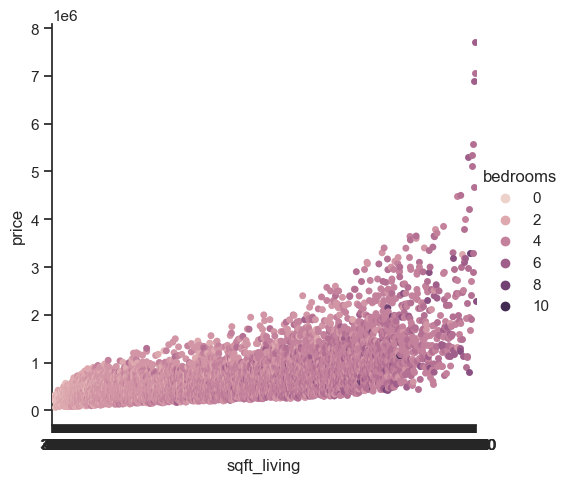

In [359]:
sns.catplot(x='sqft_living', y='price', hue='bedrooms', data=df)

This reaffirms that bedrooms tend to increase the squarefootage, thus price, of a home.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


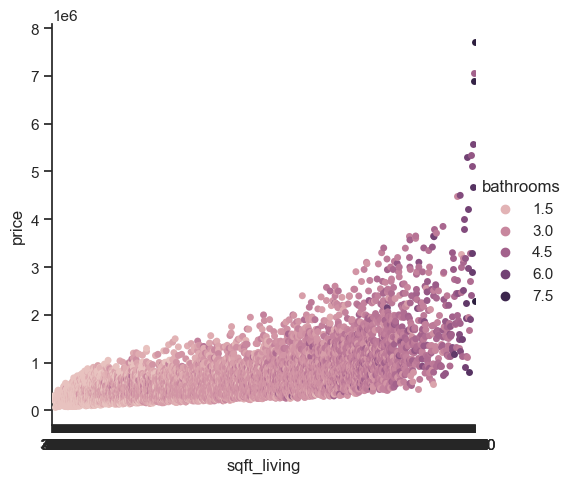

In [361]:
sns.catplot(x='sqft_living', y='price', hue='bathrooms', data=df)

This reaffirms that as the number of bathrooms increase, the squarefootage increases. Price tends to increase as squarefootage does (as determined by our correlation coefficient earlier).

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


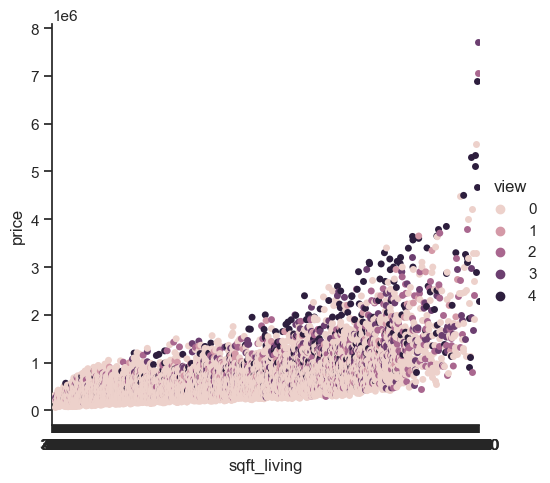

In [365]:
sns.catplot(x='sqft_living', y='price', hue='view', data=df)

This shows that the vast majority of homes have little to no view. This also verifies that a home with a better view (being 3 or 4), will likely have a higher price. It appears that larger homes are somewhat more likely to have a view.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


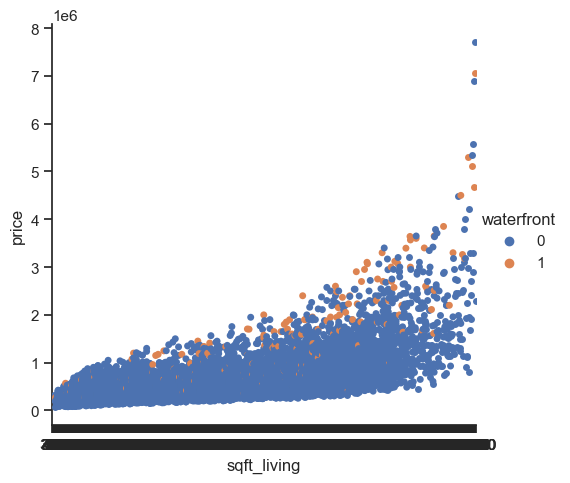

In [367]:
sns.catplot(x='sqft_living', y='price', hue='waterfront', data=df)

With 0 being equivalent to No, and 1 representing Yes, the majority of homes are not considered water front in King County. It can be seen thst waterfront homes tend to fetch a higher price, regardless of square footage.

## 07. Hypothesis and Exploratory Questions

I was surprised to find that home condition didn't have a huge impact on price. It is not surprising that a home of higher grade (material/craftsmanship) will fetch a higher price point.

It appears that homes are similarly sized to the homes surrounding, with a high correlation coefficient (0.75). Based on this, I will not be surprised to see certain neighborhoods having higher overall sales as square footage has an impact on price.

Based on a simple value count, most homes were sold between the months of April and July (months 4-7), and most of the homes in this data set were sold in 2014. It is important to note that this data set does not encompass all of 2015, instead sales are only recorded through May (month 5). This could potentially skew the data when it comes to predicting seasonality.